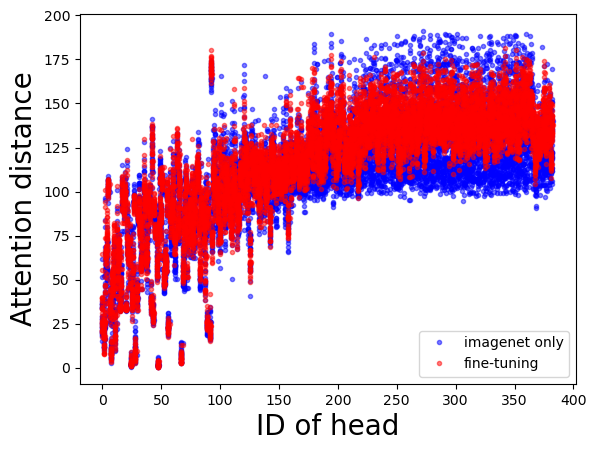

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
attn_better = pd.read_csv("./data/ad_allpth.csv", header=None)
# attn_worse = pd.read_csv("./data/attn_worsemiddle_allpth_ymax.csv", header=None)
attn_worse = pd.read_csv("./data/ad_allpth_imagenet.csv", header=None)

attn_better = attn_better.values.tolist()
# attn_better = [r[:96] for r in attn_better]
attn_better = np.array(attn_better)
# attn_better = sum(attn_better, [])

attn_worse = attn_worse.values.tolist()
# attn_worse = [r[:96] for r in attn_worse]
attn_worse = np.array(attn_worse)
# attn_worse = sum(attn_worse, [])
plt.plot(attn_worse[0],".",c="blue",label="imagenet only",alpha=0.5)
plt.plot(attn_worse.T[1:],".",c="blue",alpha=0.5)
plt.plot(attn_better[0],".",c="red",label="fine-tuning",alpha=0.5)
plt.plot(attn_better.T[1:],".",c="red",alpha=0.5)
plt.xlabel("ID of head",fontsize=20)
plt.ylabel("Attention distance",fontsize=20)
plt.legend()
plt.show()

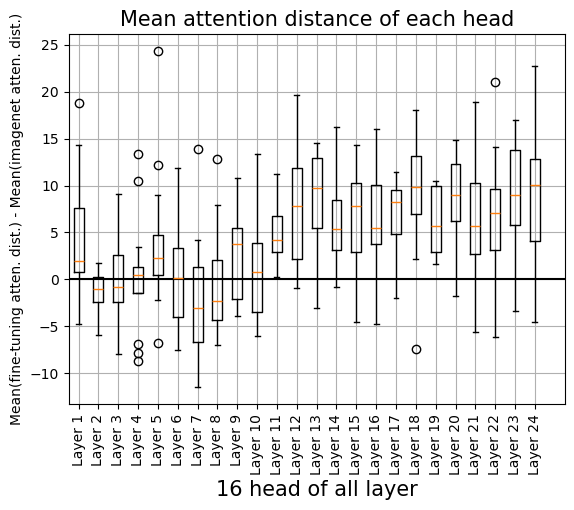

TtestResult(statistic=14.403651662909542, pvalue=3.41154899141387e-38, df=383)

In [42]:
from scipy import stats
# データの準備
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) for i in range(0, 385, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16 head of all layer",fontsize=15)
plt.ylabel("Mean(fine-tuning atten. dist.) - Mean(imagenet atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 8, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative='greater')


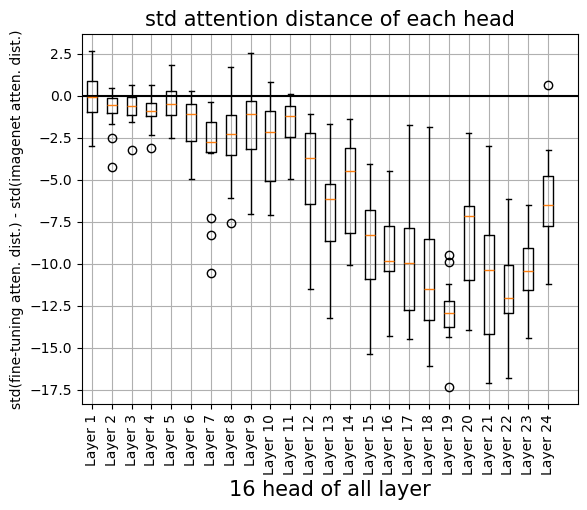

TtestResult(statistic=-22.29660348146047, pvalue=1.7109677064160879e-71, df=383)

In [43]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) for i in range(0, 385, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16 head of all layer",fontsize=15)
plt.ylabel("std(fine-tuning atten. dist.) - std(imagenet atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 7, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='less')


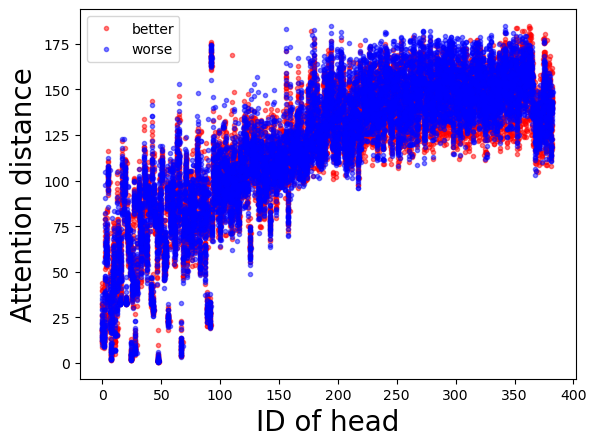

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
attn_better = pd.read_csv("./data/attn_better_allpth_ymax.csv", header=None)
attn_worse = pd.read_csv("./data/attn_worsemiddle_allpth_ymax.csv", header=None)

attn_better = attn_better.values.tolist()
# attn_better = [r[:96] for r in attn_better]
attn_better = np.array(attn_better)
# attn_better = sum(attn_better, [])

attn_worse = attn_worse.values.tolist()
# attn_worse = [r[:96] for r in attn_worse]
attn_worse = np.array(attn_worse)
# attn_worse = sum(attn_worse, [])

plt.plot(attn_better[0],".",c="red",label="better",alpha=0.5)
plt.plot(attn_better.T[1:],".",c="red",alpha=0.5)
plt.plot(attn_worse[0],".",c="blue",label="worse",alpha=0.5)
plt.plot(attn_worse.T[1:],".",c="blue",alpha=0.5)
plt.xlabel("ID of head",fontsize=20)
plt.ylabel("Attention distance",fontsize=20)
plt.legend()
plt.show()

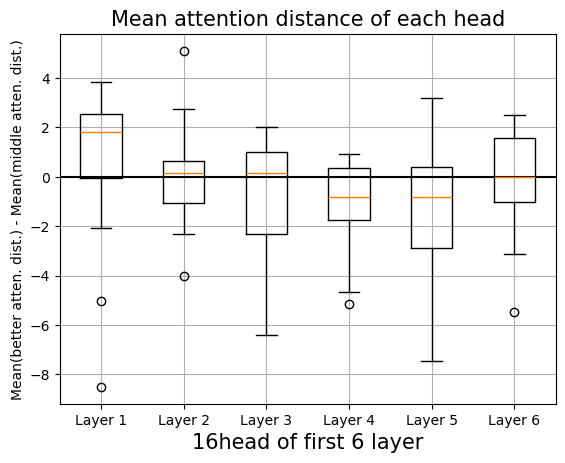

TtestResult(statistic=-7.337512830647632, pvalue=0.999999999999344, df=383)

In [2]:
from scipy import stats
# データの準備
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6 layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
# s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 8, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative='greater')


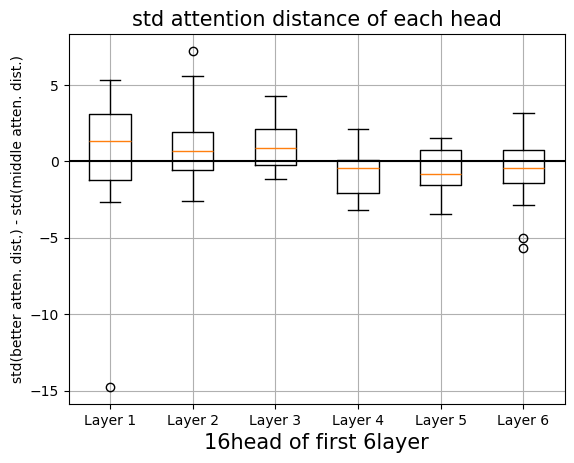

TtestResult(statistic=3.520123891430865, pvalue=0.00024162980619615358, df=383)

In [3]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(middle atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 7, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')


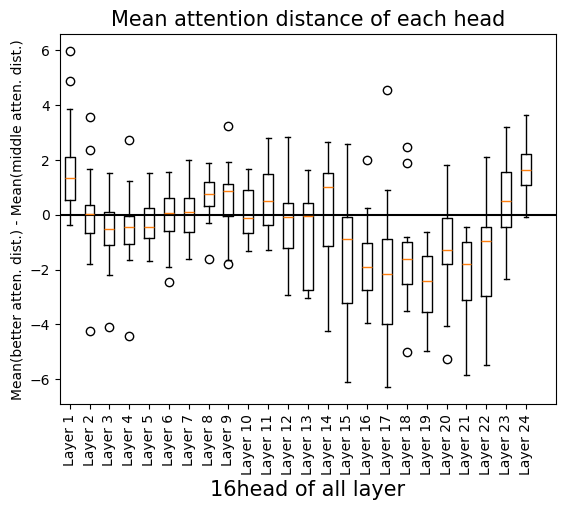

TtestResult(statistic=-4.764667377854241, pvalue=0.9999986551284945, df=383)

In [8]:
from scipy import stats
# データの準備
n_attn = 385
diff = 'greater'
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
#                 ,alternative=diff)
# plt.text(20, 9, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot_vgggp.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative=diff)


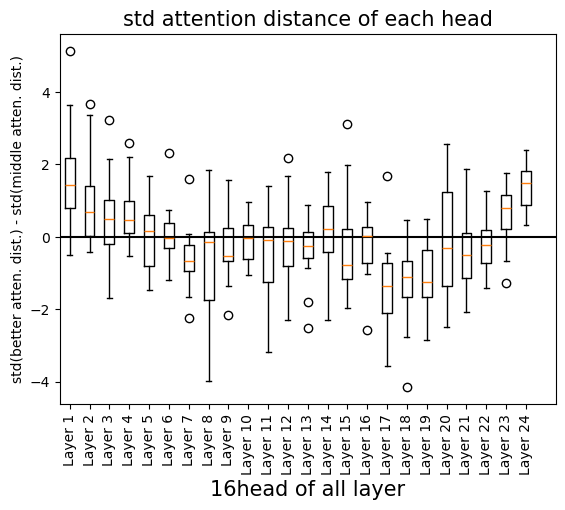

TtestResult(statistic=-1.2177874818185281, pvalue=0.8879727724416181, df=383)

In [9]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(middle atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative=diff)
# plt.text(20, 6, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot_vgggp.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative=diff)


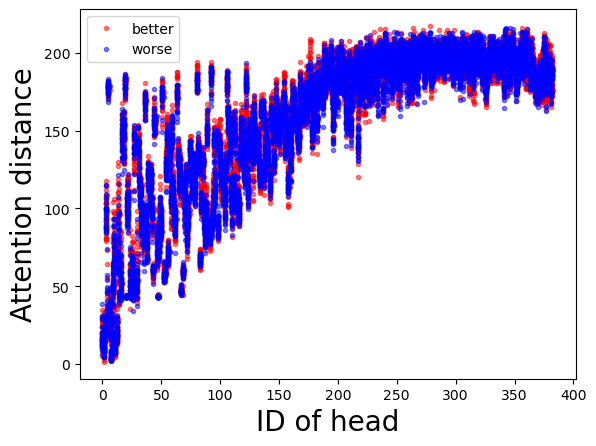

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
attn_better = pd.read_csv("data/attn_better_allpth.csv", header=None)
attn_worse = pd.read_csv("data/attn_worse_allpth.csv", header=None)

attn_better = attn_better.values.tolist()
# attn_better = [r[:96] for r in attn_better]
attn_better = np.array(attn_better)
# attn_better = sum(attn_better, [])

attn_worse = attn_worse.values.tolist()
# attn_worse = [r[:96] for r in attn_worse]
attn_worse = np.array(attn_worse)
# attn_worse = sum(attn_worse, [])

plt.plot(attn_better[0],".",c="red",label="better",alpha=0.5)
plt.plot(attn_better.T[1:],".",c="red",alpha=0.5)
plt.plot(attn_worse[0],".",c="blue",label="worse",alpha=0.5)
plt.plot(attn_worse.T[1:],".",c="blue",alpha=0.5)
plt.xlabel("ID of head",fontsize=20)
plt.ylabel("Attention distance",fontsize=20)
plt.legend()
plt.show()

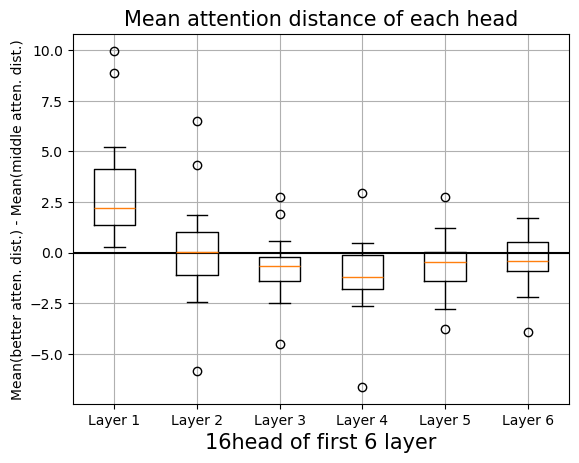

TtestResult(statistic=0.2970311954134855, pvalue=0.3833018587763751, df=383)

In [ ]:
from scipy import stats
# データの準備
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6 layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
# s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 8, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative='greater')


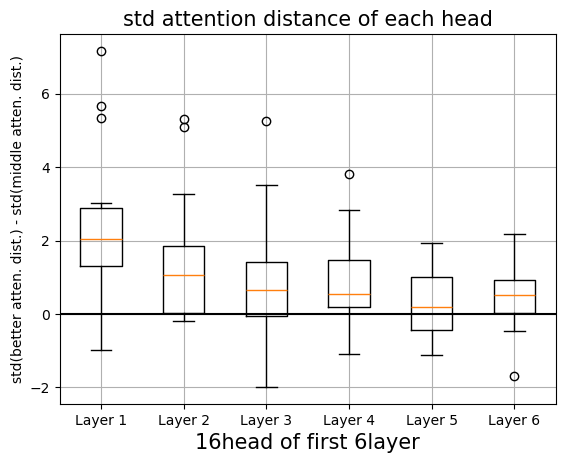

TtestResult(statistic=4.646873425474758, pvalue=2.3212541637110566e-06, df=383)

In [ ]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(middle atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 7, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')


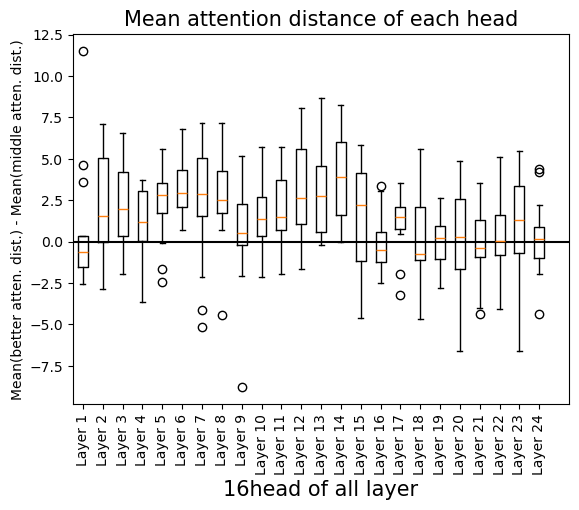

TtestResult(statistic=10.175491958187072, pvalue=5.498039334520939e-22, df=383)

In [26]:
from scipy import stats
# データの準備
n_attn = 385
diff = 'greater'
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
#                 ,alternative=diff)
# plt.text(20, 9, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot_vgggp.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative=diff)


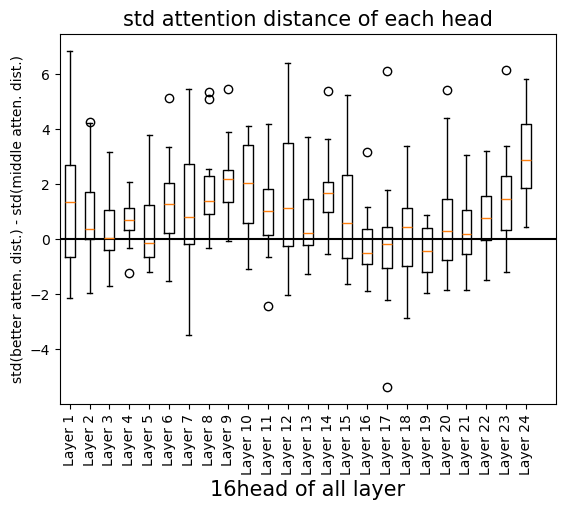

TtestResult(statistic=10.373394356262855, pvalue=1.100393359813122e-22, df=383)

In [27]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(middle atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative=diff)
# plt.text(20, 6, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot_vgggp.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative=diff)


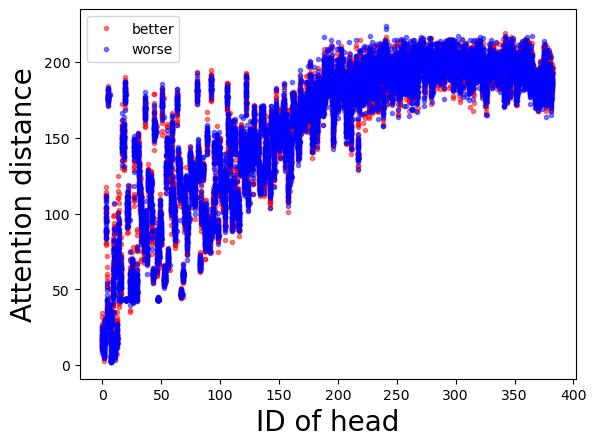

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
attn_better = pd.read_csv("data/attn_better_allpth_finetune.csv", header=None)
attn_worse = pd.read_csv("data/attn_worse_allpth_finetune.csv", header=None)

attn_better = attn_better.values.tolist()
# attn_better = [r[:96] for r in attn_better]
attn_better = np.array(attn_better)
# attn_better = sum(attn_better, [])

attn_worse = attn_worse.values.tolist()
# attn_worse = [r[:96] for r in attn_worse]
attn_worse = np.array(attn_worse)
# attn_worse = sum(attn_worse, [])

plt.plot(attn_better[0],".",c="red",label="better",alpha=0.5)
plt.plot(attn_better.T[1:],".",c="red",alpha=0.5)
plt.plot(attn_worse[0],".",c="blue",label="worse",alpha=0.5)
plt.plot(attn_worse.T[1:],".",c="blue",alpha=0.5)
plt.xlabel("ID of head",fontsize=20)
plt.ylabel("Attention distance",fontsize=20)
plt.legend()
plt.show()

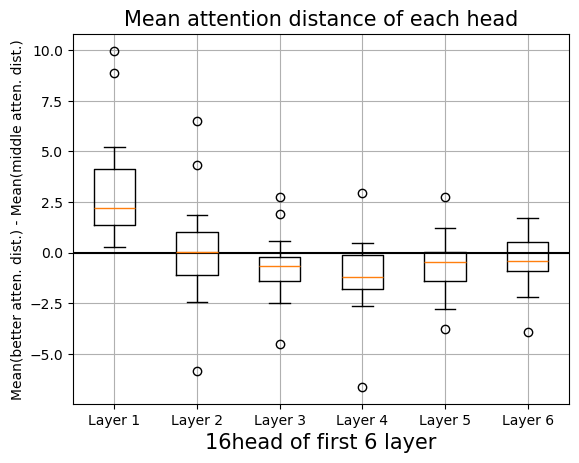

TtestResult(statistic=0.2970311954134855, pvalue=0.3833018587763751, df=383)

In [8]:
from scipy import stats
# データの準備
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6 layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
# s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 8, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative='greater')


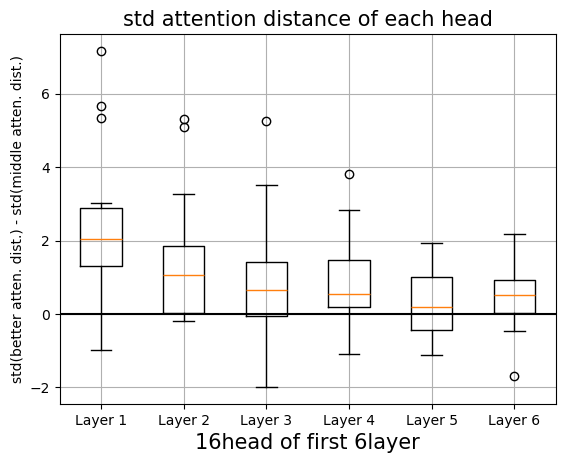

TtestResult(statistic=4.646873425474758, pvalue=2.3212541637110566e-06, df=383)

In [9]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(middle atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative='greater')
# plt.text(1, 7, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')


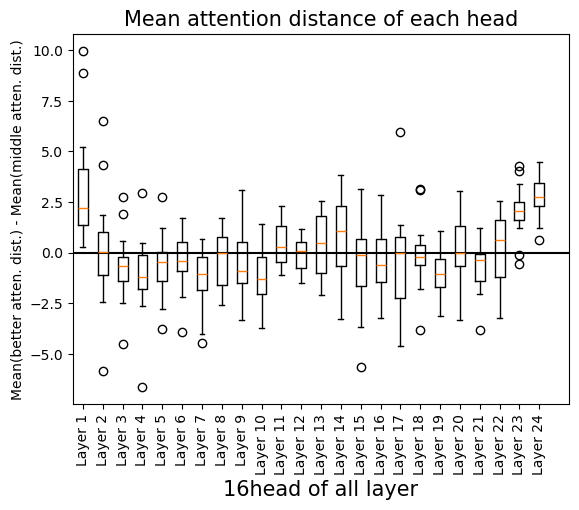

TtestResult(statistic=0.2970311954134855, pvalue=0.3833018587763751, df=383)

In [4]:
from scipy import stats
# データの準備
n_attn = 385
diff = 'greater'
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
                ,alternative=diff)
s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
                ,alternative=diff)
plt.text(20, 9, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot_vgg.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative=diff)


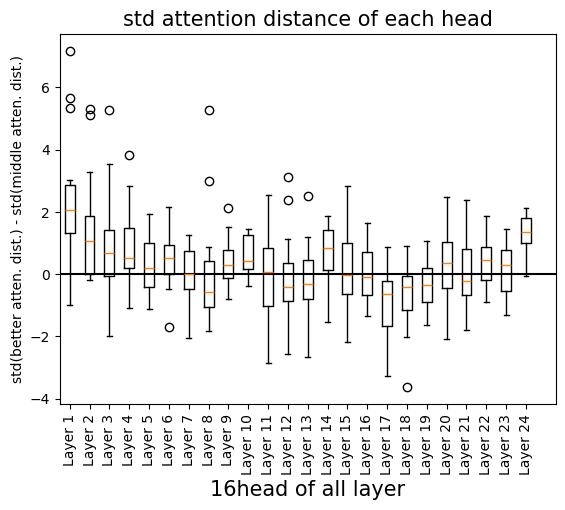

TtestResult(statistic=4.646873425474758, pvalue=2.3212541637110566e-06, df=383)

In [19]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(middle atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative=diff)
# plt.text(20, 6, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot_vgg.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative=diff)


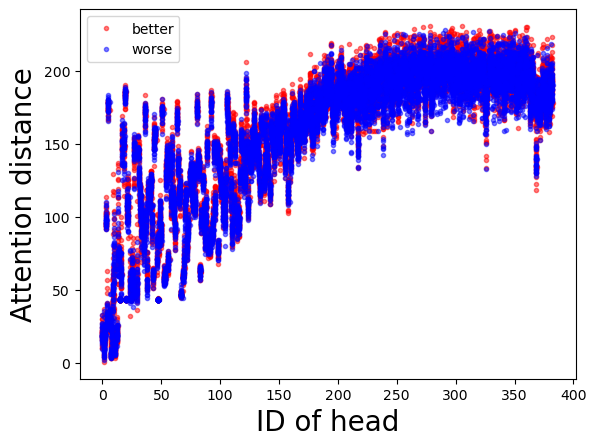

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
attn_better = pd.read_csv("data/attn_better_allpth_imagenet_vgggp.csv", header=None)
attn_worse = pd.read_csv("data/attn_worse_allpth_imagenet_vgggp.csv", header=None)

attn_better = attn_better.values.tolist()
# attn_better = [r[:96] for r in attn_better]
attn_better = np.array(attn_better)
# attn_better = sum(attn_better, [])

attn_worse = attn_worse.values.tolist()
# attn_worse = [r[:96] for r in attn_worse]
attn_worse = np.array(attn_worse)
# attn_worse = sum(attn_worse, [])

plt.plot(attn_better[0],".",c="red",label="better",alpha=0.5)
plt.plot(attn_better.T[1:],".",c="red",alpha=0.5)
plt.plot(attn_worse[0],".",c="blue",label="worse",alpha=0.5)
plt.plot(attn_worse.T[1:],".",c="blue",alpha=0.5)
plt.xlabel("ID of head",fontsize=20)
plt.ylabel("Attention distance",fontsize=20)
plt.legend()
plt.show()

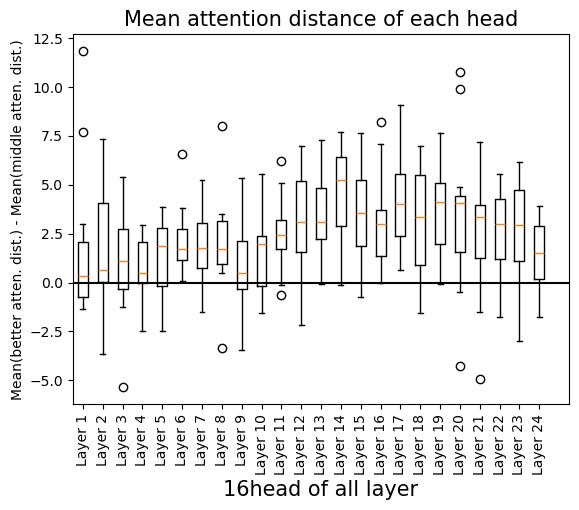

TtestResult(statistic=18.845072114693725, pvalue=7.962565149198593e-57, df=383)

In [35]:
from scipy import stats
# データの準備
n_attn = 385
diff = 'greater'
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
                ,alternative=diff)
plt.text(20, 9, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative=diff)


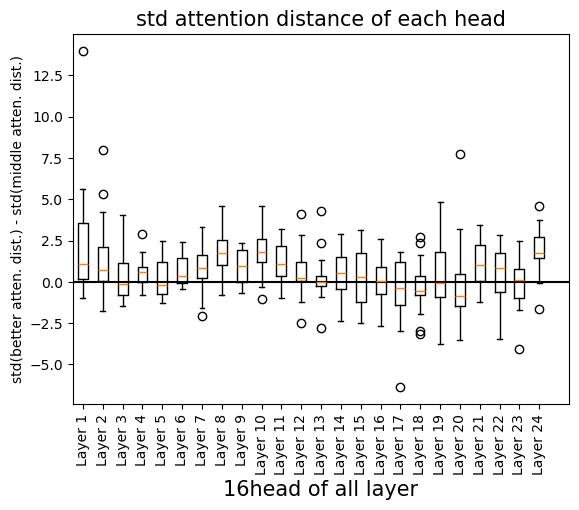

TtestResult(statistic=7.080259220525574, pvalue=3.4610778147721896e-12, df=383)

In [36]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) \
        for i in range(0, n_attn, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of all layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(middle atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 25), 
           ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6',
            'Layer 7', 'Layer 8', 'Layer 9', 'Layer 10', 'Layer 11', 'Layer 12',
            'Layer 13', 'Layer 14', 'Layer 15', 'Layer 16', 'Layer 17', 'Layer 18',
            'Layer 19', 'Layer 20', 'Layer 21', 'Layer 22', 'Layer 23', 'Layer 24'],
            rotation=90)
# s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
#                 ,alternative=diff)
# plt.text(20, 6, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
# plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative=diff)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


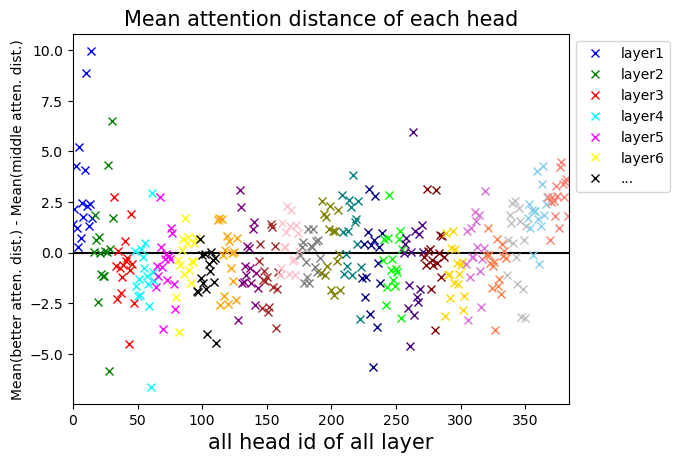

In [17]:
import numpy as np
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6', '...']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'indigo', 
          'maroon', 'gold', 'orchid', 'coral', 'silver', 'skyblue', 'salmon']

plt.plot([-1,385],[0,0],"-",c="black")
for i in range(0, 384, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.mean(attn_better.T[i:i+16],axis=1) \
                             - np.mean(attn_worse.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

#plt.plot(np.mean(attn_worse.T,axis=1),"x",c="red")
s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),
                       np.mean(attn_worse.T,axis=1),alternative='greater')
# plt.text(2, -10, f"p={p:.04f}", fontsize=15)
plt.xlabel("all head id of all layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xlim(0, 384)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_mean.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


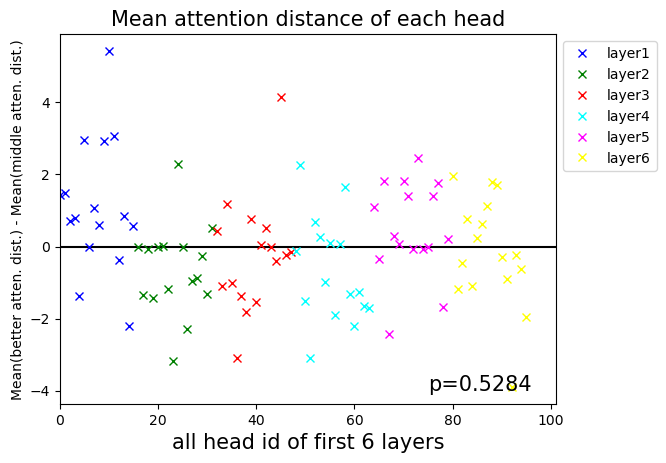

In [9]:
import numpy as np
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 
          'navy', 'lime', 'indigo', 'maroon', 'gold', 'orchid', 'coral', 
          'silver', 'skyblue', 'salmon']

plt.plot([-1,101],[0,0],"-",c="black")
for i in range(0, 96, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.mean(attn_better.T[i:i+16],axis=1) \
                             - np.mean(attn_worse.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

#plt.plot(np.mean(attn_worse.T,axis=1),"x",c="red")
s, p = stats.ttest_rel(np.mean(attn_better.T[:96],axis=1),
                       np.mean(attn_worse.T[:96],axis=1),alternative='greater')
plt.text(75, -4, f"p={p:.04f}", fontsize=15)
plt.xlabel("all head id of first 6 layers",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(middle atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xlim(0, 101)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_mean.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


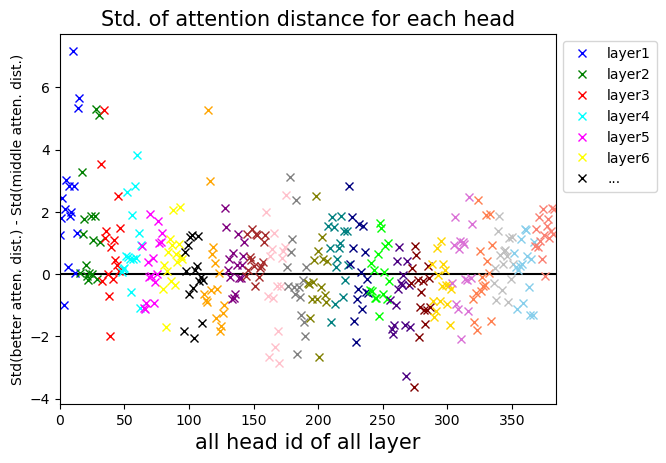

In [18]:
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6', '...']

plt.plot([-1,385],[0,0],"-",c="black")
for i in range(0, 384, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.std(attn_better.T[i:i+16],axis=1) \
                             - np.std(attn_worse.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),
                       np.std(attn_worse.T,axis=1),alternative='greater')
# plt.text(2, 11, f"p={p:.04f}", fontsize=15)
plt.xlim(0,384)
plt.xlabel("all head id of all layer",fontsize=15)
plt.ylabel("Std(better atten. dist.) - Std(middle atten. dist.)",fontsize=10)
plt.title("Std. of attention distance for each head",fontsize=15)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_std.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


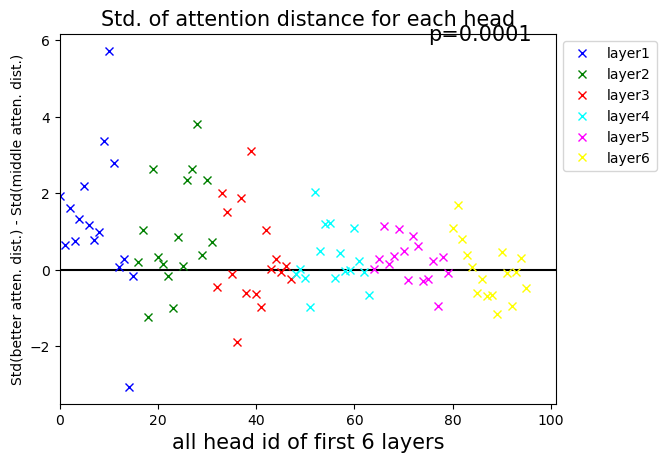

In [11]:
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

plt.plot([-1,101],[0,0],"-",c="black")
for i in range(0, 96, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.std(attn_better.T[i:i+16],axis=1) \
                             - np.std(attn_worse.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

s, p = stats.ttest_rel(np.std(attn_better.T[:96],axis=1),
                       np.std(attn_worse.T[:96],axis=1),alternative='greater')
plt.text(75, 6, f"p={p:.04f}", fontsize=15)
plt.xlim(0,101)
plt.xlabel("all head id of first 6 layers",fontsize=15)
plt.ylabel("Std(better atten. dist.) - Std(middle atten. dist.)",fontsize=10)
plt.title("Std. of attention distance for each head",fontsize=15)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_std.eps')
plt.show()

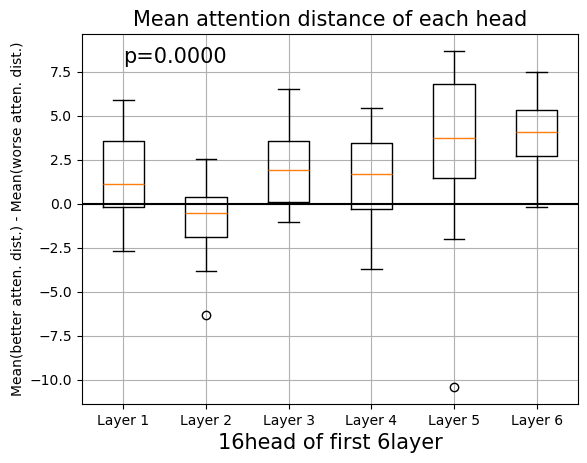

TtestResult(statistic=5.786768160946312, pvalue=4.593120273429843e-08, df=95)

In [ ]:
from scipy import stats
# データの準備
data = [np.mean(attn_better.T[i:i+16],axis=1)-np.mean(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("Mean(better atten. dist.) - Mean(worse atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
s, p = stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1)
                ,alternative='greater')
plt.text(1, 8, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.mean(attn_better.T,axis=1),np.mean(attn_worse.T,axis=1),alternative='greater')


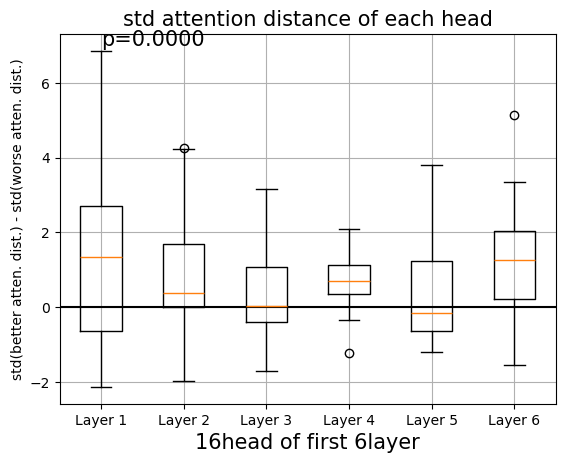

TtestResult(statistic=10.373394356262855, pvalue=1.100393359813122e-22, df=383)

In [4]:
from scipy import stats
# データの準備
data = [np.std(attn_better.T[i:i+16],axis=1)-np.std(attn_worse.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("std(better atten. dist.) - std(worse atten. dist.)",fontsize=10)
plt.title("std attention distance of each head",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
s, p = stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1)
                ,alternative='greater')
plt.text(1, 7, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()

# stats.ttest_ind(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')
stats.ttest_rel(np.std(attn_better.T,axis=1),np.std(attn_worse.T,axis=1),alternative='greater')


In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

attn_high_KIc = pd.read_csv("./data/attn_high_KIc.csv", header=None)
attn_high_KIc = attn_high_KIc.values.tolist()
# attn_high_KIc = [r[:100] for r in attn_high_KIc]
attn_high_KIc = np.array(attn_high_KIc)
# attn_high_KIc = sum(attn_high_KIc, [])

attn_low_KIc = pd.read_csv("./data/attn_low_KIc.csv", header=None)
attn_low_KIc = attn_low_KIc.values.tolist()
# attn_low_KIc = [r[:100] for r in attn_low_KIc]
attn_low_KIc = np.array(attn_low_KIc)
# attn_low_KIc = sum(attn_low_KIc, [])

attn_middle_KIc = pd.read_csv("./data/attn_middle_KIc.csv", header=None)
attn_middle_KIc = attn_middle_KIc.values.tolist()
# attn_middle_KIc = [r[:100] for r in attn_middle_KIc]
attn_middle_KIc = np.array(attn_middle_KIc)
# attn_middle_KIc = sum(attn_middle_KIc, [])

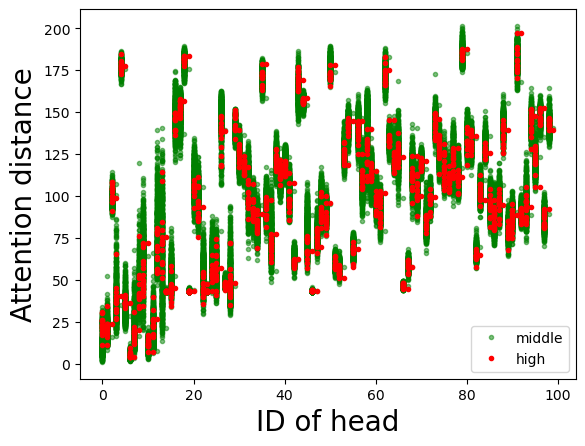

In [ ]:
plt.plot(attn_middle_KIc[0],".",c="green",label="middle",alpha=0.5)
plt.plot(attn_middle_KIc.T[1:],".",c="green",alpha=0.5)
plt.plot(attn_high_KIc[0],".",c="red",label="high")
plt.plot(attn_high_KIc.T[1:],".",c="red")
plt.xlabel("ID of head",fontsize=20)
plt.ylabel("Attention distance",fontsize=20)
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


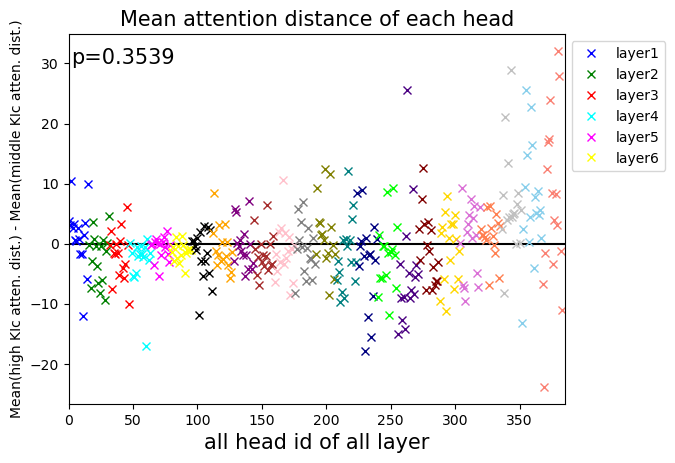

In [13]:
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

plt.plot([-1,385],[0,0],"-",c="black")
for i in range(0, 384, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.mean(attn_high_KIc.T[i:i+16],axis=1) \
                             - np.mean(attn_middle_KIc.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

s, p = stats.ttest_rel(np.mean(attn_high_KIc.T,axis=1),
                       np.mean(attn_middle_KIc.T,axis=1),alternative='less')
plt.text(2, 30, f"p={p:.4f}", fontsize=15)
plt.xlabel("all head id of all layer",fontsize=15)
plt.ylabel("Mean(high KIc atten. dist.) - Mean(middle KIc atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xlim(0,385)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_mean.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


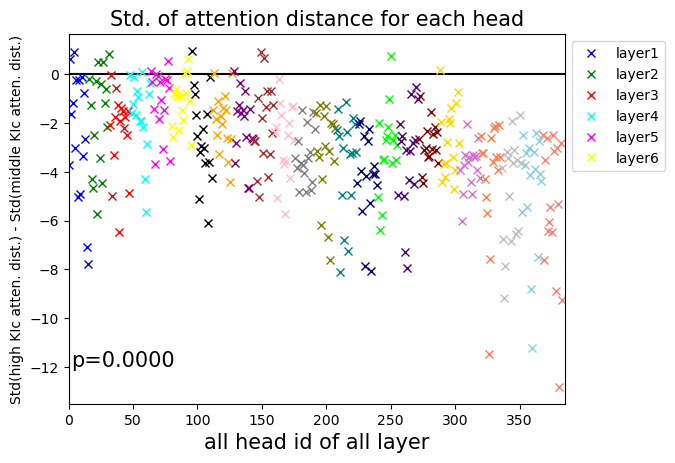

In [14]:
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

plt.plot([-1,385],[0,0],"-",c="black")
# p, = plt.plot([i for i in range(0,16)], (np.std(attn_high_KIc.T[0:16],axis=1) \
#                             -np.std(attn_middle_KIc.T[0:16],axis=1)),"x",c="blue")
# handle_list.append(p)
# p, = plt.plot([i for i in range(16,32)], (np.std(attn_high_KIc.T[16:32],axis=1) \
#                             -np.std(attn_middle_KIc.T[16:32],axis=1)),"x",c="gray")
# handle_list.append(p)
# p, = plt.plot([i for i in range(32,48)], (np.std(attn_high_KIc.T[32:48],axis=1) \
#                             -np.std(attn_middle_KIc.T[32:48],axis=1)),"x",c="green")
# handle_list.append(p)
# p, = plt.plot([i for i in range(48,64)], (np.std(attn_high_KIc.T[48:64],axis=1) \
#                             -np.std(attn_middle_KIc.T[48:64],axis=1)),"x",c="black")
# handle_list.append(p)
# p, = plt.plot([i for i in range(64,80)], (np.std(attn_high_KIc.T[64:80],axis=1) \
#                             -np.std(attn_middle_KIc.T[64:80],axis=1)),"x",c="red")
# handle_list.append(p)
# p, = plt.plot([i for i in range(80,96)], (np.std(attn_high_KIc.T[80:96],axis=1) \
#                             -np.std(attn_middle_KIc.T[80:96],axis=1)),"x",c="purple")
# handle_list.append(p)

for i in range(0, 384, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.std(attn_high_KIc.T[i:i+16],axis=1) \
                             - np.std(attn_middle_KIc.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

s, p = stats.ttest_rel(np.std(attn_high_KIc.T,axis=1),
                       np.std(attn_middle_KIc.T,axis=1),alternative='less')
plt.text(2, -12, f"p={p:.04f}", fontsize=15)
plt.xlim(0,385)
plt.xlabel("all head id of all layer",fontsize=15)
plt.ylabel("Std(high KIc atten. dist.) - Std(middle KIc atten. dist.)",fontsize=10)
plt.title("Std. of attention distance for each head",fontsize=15)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_std.eps')
plt.show()

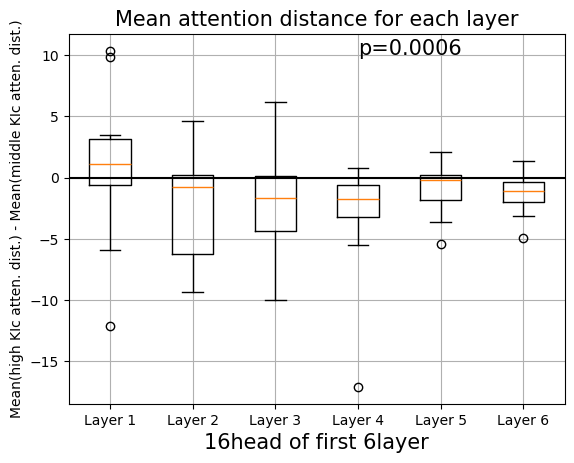

In [39]:
# データの準備
data = [np.mean(attn_high_KIc.T[i:i+16],axis=1)-np.mean(attn_middle_KIc.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("Mean(high KIc atten. dist.) - Mean(middle KIc atten. dist.)",fontsize=10)
plt.title("Mean attention distance for each layer",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
s, p = stats.ttest_rel(np.mean(attn_high_KIc.T,axis=1),np.mean(attn_middle_KIc.T,axis=1)
                ,alternative='less')
plt.text(4, 10, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()

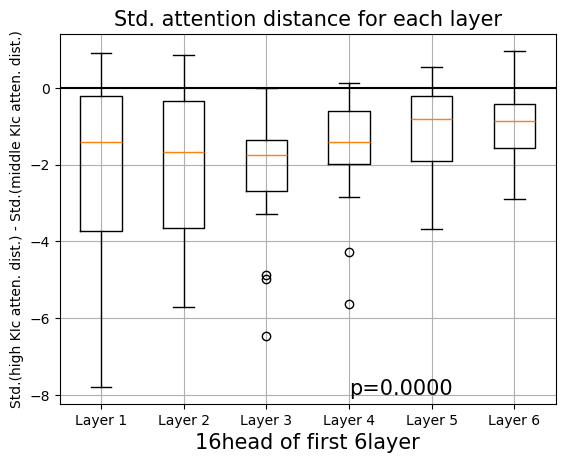

In [59]:
# データの準備
data = [np.std(attn_high_KIc.T[i:i+16],axis=1)-np.std(attn_middle_KIc.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("Std.(high KIc atten. dist.) - Std.(middle KIc atten. dist.)",fontsize=10)
plt.title("Std. attention distance for each layer",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
s, p = stats.ttest_rel(np.std(attn_high_KIc.T,axis=1),np.std(attn_middle_KIc.T,axis=1)
                ,alternative='less')
plt.text(4, -8, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()


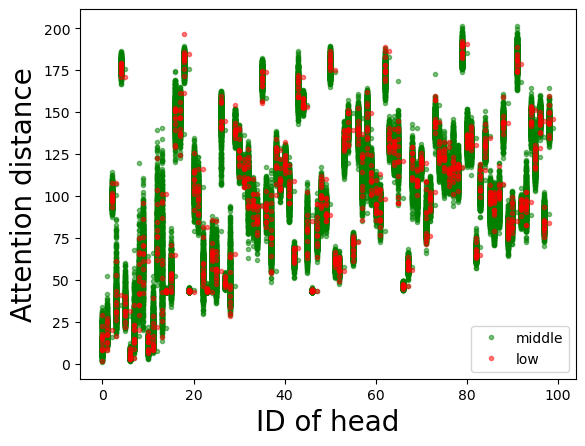

In [ ]:
plt.plot(attn_middle_KIc[0],".",c="green",label="middle",alpha=0.5)
plt.plot(attn_middle_KIc.T[1:],".",c="green",alpha=0.5)
plt.plot(attn_low_KIc[0],".",c="red",label="low",alpha=0.5)
plt.plot(attn_low_KIc.T[1:],".",c="red",alpha=0.5)
plt.xlabel("ID of head",fontsize=20)
plt.ylabel("Attention distance",fontsize=20)
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


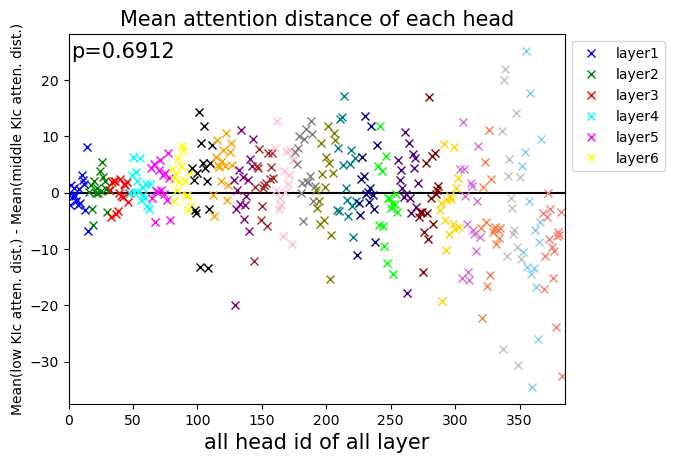

In [16]:
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

plt.plot([-1,385],[0,0],"-",c="black")
for i in range(0, 384, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.mean(attn_low_KIc.T[i:i+16],axis=1) \
                             - np.mean(attn_middle_KIc.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

s, p = stats.ttest_rel(np.mean(attn_low_KIc.T,axis=1),
                       np.mean(attn_middle_KIc.T,axis=1),alternative='greater')
plt.text(2, 24, f"p={p:.4f}", fontsize=15)
plt.xlabel("all head id of all layer",fontsize=15)
plt.ylabel("Mean(low KIc atten. dist.) - Mean(middle KIc atten. dist.)",fontsize=10)
plt.title("Mean attention distance of each head",fontsize=15)
plt.xlim(0,385)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_mean.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


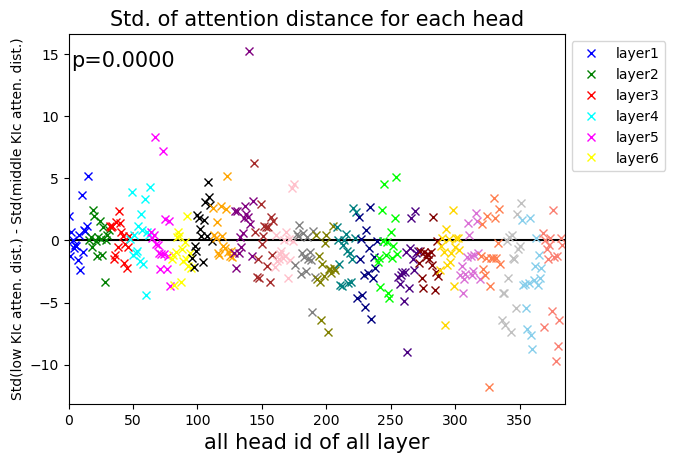

In [17]:
handle_list = []
legend_list = ['layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

plt.plot([-1,385],[0,0],"-",c="black")
for i in range(0, 384, 16):
    p, = plt.plot([j for j in range(i, i+16)], (np.std(attn_low_KIc.T[i:i+16],axis=1) \
                             - np.std(attn_middle_KIc.T[i:i+16], axis=1)),"x",c=colors[i//16])
    handle_list.append(p)

s, p = stats.ttest_rel(np.std(attn_low_KIc.T,axis=1),
                       np.std(attn_middle_KIc.T,axis=1),alternative='less')
plt.text(2, 14, f"p={p:.4f}", fontsize=15)
plt.xlim(0,385)
plt.xlabel("all head id of all layer",fontsize=15)
plt.ylabel("Std(low KIc atten. dist.) - Std(middle KIc atten. dist.)",fontsize=10)
plt.title("Std. of attention distance for each head",fontsize=15)
plt.legend(handle_list, legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('../Figure/ad_std.eps')
plt.show()

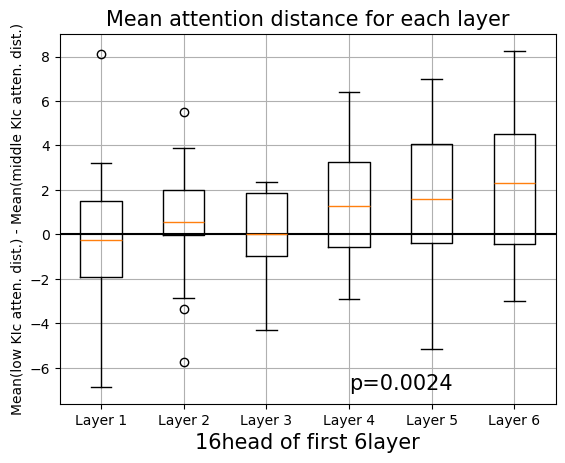

TtestResult(statistic=2.888274364200437, pvalue=0.002379053074856198, df=99)

In [52]:
# データの準備
data = [np.mean(attn_low_KIc.T[i:i+16],axis=1)-np.mean(attn_middle_KIc.T[i:i+16],axis=1) for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("Mean(low KIc atten. dist.) - Mean(middle KIc atten. dist.)",fontsize=10)
plt.title("Mean attention distance for each layer",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
s, p = stats.ttest_rel(np.mean(attn_low_KIc.T,axis=1),np.mean(attn_middle_KIc.T,axis=1)
                ,alternative='greater')
plt.text(4, -7, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_mean_boxplot.eps")
plt.show()
stats.ttest_rel(np.mean(attn_low_KIc.T,axis=1),np.mean(attn_middle_KIc.T,axis=1),alternative='greater')

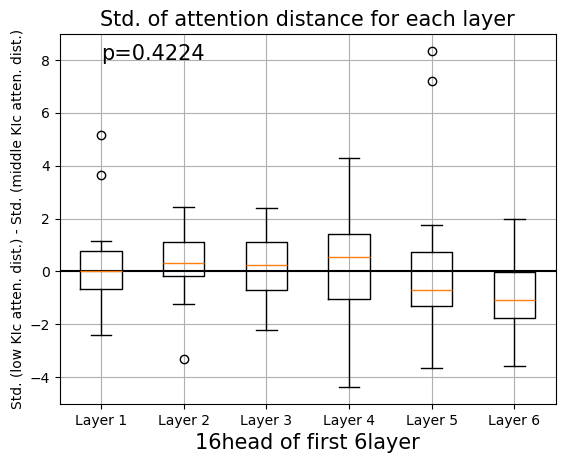

TtestResult(statistic=0.19628938951893546, pvalue=0.422393016778087, df=99)

In [51]:
# データの準備
data = [np.std(attn_low_KIc.T[i:i+16],axis=1)-np.std(attn_middle_KIc.T[i:i+16],axis=1) 
        for i in range(0, 96, 16)]

# 箱ひげ図のプロット
plt.boxplot(data)

# x=0に黒線を追加
plt.axhline(0, color='black')

# ラベル設定
plt.xlabel("16head of first 6layer",fontsize=15)
plt.ylabel("Std. (low KIc atten. dist.) - Std. (middle KIc atten. dist.)",fontsize=10)
plt.title("Std. of attention distance for each layer",fontsize=15)
plt.xticks(range(1, 7), ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])
s, p = stats.ttest_rel(np.std(attn_low_KIc.T,axis=1),np.std(attn_middle_KIc.T,axis=1)
                ,alternative='greater')
plt.text(1, 8, f"p={p:.04f}", fontsize=15)
# グリッド線の表示
plt.grid(True)

# グラフの表示
plt.savefig("../Figure/ad_std_boxplot.eps")
plt.show()

stats.ttest_rel(np.std(attn_low_KIc.T,axis=1),np.std(attn_middle_KIc.T,axis=1),
                alternative='greater')